# 0) Imports

In [1]:
# install the main library YFinance
!pip install yfinance

In [2]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import time
from datetime import date
from datetime import datetime


In [3]:
# Limit window size and enable scrolling of outputs
from IPython.display import Javascript

display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

<IPython.core.display.Javascript object>

# Setting the Date

In [4]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2025; month= 6; day=2
Period for indexes: 1955-06-02 to 2025-06-02 


## Question 1: [Index] S&P 500 Stocks Added to the Index
**Which year had the highest number of additions?**
<br>Using the list of S&P 500 companies from Wikipedia's S&P 500 companies page, download the data including the year each company was added to the index.

In [5]:
# Use pandas to read the table into a DataFrame
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
df = pd.read_html(url)[0]
df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             503 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [7]:
# Create a DataFrame with company tickers, names, and the year they were added.
df_data = df[['Symbol', 'Security', 'Date added']]
df_data= df_data.rename(columns={'Symbol':'Ticker', 'Security':'Company', 'Date added':'Date_added'})
df_data['Date_added'] = pd.to_datetime(df_data['Date_added'])
df_data

,Ticker,Company,Date_added
0,MMM,3M,1957-03-04
1,AOS,A. O. Smith,2017-07-26
2,ABT,Abbott Laboratories,1957-03-04
3,ABBV,AbbVie,2012-12-31
4,ACN,Accenture,2011-07-06
...,...,...,...
498,XYL,Xylem Inc.,2011-11-01
499,YUM,Yum! Brands,1997-10-06
500,ZBRA,Zebra Technologies,2019-12-23
501,ZBH,Zimmer Biomet,2001-08-07


In [8]:
# Extract the year from the addition date
df_data['Year_added'] = df_data['Date_added'].dt.strftime('%Y')
df_data

,Ticker,Company,Date_added,Year_added
0,MMM,3M,1957-03-04,1957
1,AOS,A. O. Smith,2017-07-26,2017
2,ABT,Abbott Laboratories,1957-03-04,1957
3,ABBV,AbbVie,2012-12-31,2012
4,ACN,Accenture,2011-07-06,2011
...,...,...,...,...
498,XYL,Xylem Inc.,2011-11-01,2011
499,YUM,Yum! Brands,1997-10-06,1997
500,ZBRA,Zebra Technologies,2019-12-23,2019
501,ZBH,Zimmer Biomet,2001-08-07,2001


In [9]:
# and calculate the number of stocks added each year.
df_stocks = df_data[['Company', 'Year_added']].groupby('Year_added').count()
df_stocks.sort_values('Company', ascending = False)

,Company
Year_added,
1957,53
2016,23
2017,23
2019,22
2008,17
2024,16
2022,16
2023,15
2021,15


#### Answer Question 1:
The years 2016 and **2017** have the highest number of additions (excluding 1957 the year the index was founded) - 23 additions.

#### Additional: How many current S&P 500 stocks have been in the index for more than 20 years?

In [10]:
# Calculate the difference in years (divide by 365.25 to account for leap years) and add column
current_date = datetime.now()
df_data['Years_in_index'] = ((current_date - df_data['Date_added']).dt.days / 365.25).round(2)
df_data

,Ticker,Company,Date_added,Year_added,Years_in_index
0,MMM,3M,1957-03-04,1957,68.25
1,AOS,A. O. Smith,2017-07-26,2017,7.85
2,ABT,Abbott Laboratories,1957-03-04,1957,68.25
3,ABBV,AbbVie,2012-12-31,2012,12.42
4,ACN,Accenture,2011-07-06,2011,13.91
...,...,...,...,...,...
498,XYL,Xylem Inc.,2011-11-01,2011,13.59
499,YUM,Yum! Brands,1997-10-06,1997,27.66
500,ZBRA,Zebra Technologies,2019-12-23,2019,5.44
501,ZBH,Zimmer Biomet,2001-08-07,2001,23.82


In [11]:
# Filter and count companies older than 20 years
df_Companies_20plus = df_data[df_data['Years_in_index'] > 20]
df_Companies_20plus

,Ticker,Company,Date_added,Year_added,Years_in_index
0,MMM,3M,1957-03-04,1957,68.25
2,ABT,Abbott Laboratories,1957-03-04,1957,68.25
5,ADBE,Adobe Inc.,1997-05-05,1997,28.08
7,AES,AES Corporation,1998-10-02,1998,26.67
8,AFL,Aflac,1999-05-28,1999,26.02
...,...,...,...,...,...
491,WY,Weyerhaeuser,1979-10-01,1979,45.67
493,WMB,Williams Companies,1975-03-31,1975,50.17
497,XEL,Xcel Energy,1957-03-04,1957,68.25
499,YUM,Yum! Brands,1997-10-06,1997,27.66


In [12]:
#Count companies older than 20 years
len(df_Companies_20plus)

219

#### Answer Question 1 Additional:
There are **219** companies older than 20 years

## Question 2. [Macro] Indexes YTD (as of 1 May 2025)
**How many indexes (out of 10) have better year-to-date returns than the US (S&P 500) as of May 1, 2025?**

Using Yahoo Finance World Indices data, compare the year-to-date (YTD) performance (1 January-1 May 2025) of major stock market indexes for the following countries:

* United States - S&P 500 (^GSPC)
* China - Shanghai Composite (000001.SS)
* Hong Kong - HANG SENG INDEX (^HSI)
* Australia - S&P/ASX 200 (^AXJO)
* India - Nifty 50 (^NSEI)
* Canada - S&P/TSX Composite (^GSPTSE)
* Germany - DAX (^GDAXI)
* United Kingdom - FTSE 100 (^FTSE)
* Japan - Nikkei 225 (^N225)
* Mexico - IPC Mexico (^MXX)
* Brazil - Ibovespa (^BVSP)

<br>Hint: use start_date='2025-01-01' and end_date='2025-05-01' when downloading daily data in yfinance

Stock exhanges are closed on the 1st Jan and other public holidays (country dependent) therefore use forward fill and back fill for the missing values

In [13]:
# Define the start and end dates (to convert to UTC use: .tz_localize('UTC'))
end_str = '2025-05-01'
end_date = pd.to_datetime(end_str).tz_localize('UTC')
print(f'Year = {end_date.year}; month= {end_date.month}; day={end_date.day}')

start_str = '2025-01-01'
start_date = pd.to_datetime(start_str).tz_localize('UTC')
print(f'Period for indexes: {start_date} to {end_date} ')

days = (end_date - start_date).days
print(f'Number of calendar days: {days}')

Year = 2025; month= 5; day=1
Period for indexes: 2025-01-01 00:00:00+00:00 to 2025-05-01 00:00:00+00:00 
Number of calendar days: 120


In [14]:
# Download the relevant data from yfinance using the download method (more than one ticker)
indexes = ["^GSPC", "000001.SS", "^HSI", "^AXJO", "^NSEI", "^GSPTSE",
           "^GDAXI", "^FTSE", "^N225", "^MXX", "^BVSP"]
tickers = yf.download(indexes, start = start_date, end = end_date, auto_adjust=True)
tickers

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  11 of 11 completed


Price             Close                                                    \
Ticker        000001.SS        ^AXJO     ^BVSP        ^FTSE        ^GDAXI   
Date                                                                        
2025-01-01          NaN          NaN       NaN          NaN           NaN   
2025-01-02  3262.561035  8201.200195  120125.0  8260.099609  20024.660156   
2025-01-03  3211.429932  8250.500000  118533.0  8224.000000  19906.080078   
2025-01-06  3206.923096  8288.500000  120022.0  8249.700195  20216.189453   
2025-01-07  3229.644043  8285.099609  121163.0  8245.299805  20340.570312   
...                 ...          ...       ...          ...           ...   
2025-04-24  3297.288086  7968.200195  134580.0  8407.400391  22064.509766   
2025-04-25  3295.060059          NaN  134739.0  8415.299805  22242.449219   
2025-04-28  3288.415039  7997.100098  135016.0  8417.299805  22271.669922   
2025-04-29  3286.655029  8070.600098  135093.0  8463.500000  22425.830078   
2025-04-30  3279.031006  8126.200195  135067.0  8494.900391  22496.980469   

Price                                                              \
Ticker            ^GSPC       ^GSPTSE          ^HSI          ^MXX   
Date                                                                
2025-01-01          NaN           NaN           NaN           NaN   
2025-01-02  5868.549805  24898.000000  19623.320312  49765.199219   
2025-01-03  5942.470215  25073.500000  19760.269531  48957.238281   
2025-01-06  5975.379883  24999.800781  19688.289062  49493.558594   
2025-01-07  5909.029785  24929.900391  19447.580078  50085.500000   
...                 ...           ...           ...           ...   
2025-04-24  5484.770020  24727.500000  21909.759766  56382.000000   
2025-04-25  5525.209961  24710.500000  21980.740234  56720.121094   
2025-04-28  5528.750000  24798.599609  21971.960938  56980.128906   
2025-04-29  5560.830078  24874.500000  22008.109375  55613.429688   
2025-04-30  5569.060059  24841.699219  22119.410156  56259.281250   

Price                     ...    Volume                                        \
Ticker             ^N225  ...     ^AXJO       ^BVSP         ^FTSE      ^GDAXI   
Date                      ...                                                   
2025-01-01           NaN  ...       NaN         NaN           NaN         NaN   
2025-01-02           NaN  ...  304400.0   9373600.0  4.222199e+08  52445600.0   
2025-01-03           NaN  ...  329100.0   9804400.0  7.425039e+08  44372900.0   
2025-01-06  39307.050781  ...   52200.0   9685600.0  7.662447e+08  70784900.0   
2025-01-07  40083.300781  ...  424300.0  11116400.0  7.415068e+08  62020000.0   
...                  ...  ...       ...         ...           ...         ...   
2025-04-24  35039.148438  ...  639100.0  14113400.0  1.126606e+09  62636800.0   
2025-04-25  35705.738281  ...       NaN  13051800.0  8.027340e+08  70917400.0   
2025-04-28  35839.988281  ...  769000.0  11449700.0  7.387417e+08  55883200.0   
2025-04-29           NaN  ...  710800.0  12761100.0  6.559248e+08  75547100.0   
2025-04-30  36045.378906  ...  889500.0  15452400.0  1.589592e+09  99189800.0   

Price                                                                          \
Ticker             ^GSPC      ^GSPTSE          ^HSI         ^MXX        ^N225   
Date                                                                            
2025-01-01           NaN          NaN           NaN          NaN          NaN   
2025-01-02  3.621680e+09  215089400.0  4.033400e+09   87535300.0          NaN   
2025-01-03  3.667340e+09  186569100.0  3.393800e+09  112782300.0          NaN   
2025-01-06  4.940120e+09  239976800.0  2.465700e+09  139872100.0  137900000.0   
2025-01-07  4.517330e+09  237759800.0  3.581000e+09  142173400.0  127000000.0   
...                  ...          ...           ...          ...          ...   
2025-04-24  4.697710e+09  224419200.0  2.985800e+09  249950000.0  137100000.0   
2025-04-2

In [15]:
# Find the first close value and use back fill for any missing values

close_at_start = tickers['Close'].bfill().iloc[0]
close_at_start

,2025-01-01
Ticker,
000001.SS,3262.561035
^AXJO,8201.200195
^BVSP,120125.000000
^FTSE,8260.099609
^GDAXI,20024.660156
^GSPC,5868.549805
^GSPTSE,24898.000000
^HSI,19623.320312
^MXX,49765.199219


In [16]:
# Find the last close value and use forward fill for any missing values

close_at_end = tickers['Close'].ffill().iloc[-1]
close_at_end

,2025-04-30
Ticker,
000001.SS,3279.031006
^AXJO,8126.200195
^BVSP,135067.000000
^FTSE,8494.900391
^GDAXI,22496.980469
^GSPC,5569.060059
^GSPTSE,24841.699219
^HSI,22119.410156
^MXX,56259.281250


In [17]:
# Compare the year-to-date (YTD) performance
YTD_Performance = (100 * ((close_at_end / close_at_start)  - 1)).round(2).sort_values()
YTD_Performance

,0
Ticker,
^N225,-8.30
^GSPC,-5.10
^AXJO,-0.91
^GSPTSE,-0.23
000001.SS,0.50
^NSEI,2.49
^FTSE,2.84
^GDAXI,12.35
^BVSP,12.44


### Answer Question 2:
**9** out of 10 indexes have a better year-to-date return than the US (S&P 500). Only Japan (Nikkei) has a worse return.

In [18]:
ytd_growth = (100 * (close_at_end - close_at_start) / close_at_end).round(2).sort_values()
print(f'The percentage change is {ytd_growth} %')

The percentage change is Ticker
^N225        -9.05
^GSPC        -5.38
^AXJO        -0.92
^GSPTSE      -0.23
000001.SS     0.50
^NSEI         2.43
^FTSE         2.76
^GDAXI       10.99
^BVSP        11.06
^HSI         11.28
^MXX         11.54
dtype: float64 %


#### Additional: How many of these indexes have better returns than the S&P 500 over 3, 5, and 10 year periods? Do you see the same trend? Note: For simplicity, ignore currency conversion effects.


In [19]:
# Download the relevant data from yfinance using the download method (more than one ticker)

start_str3Y = '2022-05-01'
start_date3Y = pd.to_datetime(start_str3Y).tz_localize('UTC')


indexes = ["^GSPC", "000001.SS", "^HSI", "^AXJO", "^NSEI", "^GSPTSE",
           "^GDAXI", "^FTSE", "^N225", "^MXX", "^BVSP"]
tickers3Y = yf.download(indexes, start = start_date3Y, end = end_date)
tickers3Y

[*********************100%***********************]  11 of 11 completed


Price             Close                                                    \
Ticker        000001.SS        ^AXJO     ^BVSP        ^FTSE        ^GDAXI   
Date                                                                        
2022-05-02          NaN  7347.000000  106639.0          NaN  13939.070312   
2022-05-03          NaN  7316.200195  106528.0  7561.299805  14039.469727   
2022-05-04          NaN  7304.700195  108344.0  7493.500000  13970.820312   
2022-05-05  3067.760010  7364.700195  105304.0  7503.299805  13902.519531   
2022-05-06  3001.560059  7205.600098  105135.0  7387.899902  13674.290039   
...                 ...          ...       ...          ...           ...   
2025-04-24  3297.288086  7968.200195  134580.0  8407.400391  22064.509766   
2025-04-25  3295.060059          NaN  134739.0  8415.299805  22242.449219   
2025-04-28  3288.415039  7997.100098  135016.0  8417.299805  22271.669922   
2025-04-29  3286.655029  8070.600098  135093.0  8463.500000  22425.830078   
2025-04-30  3279.031006  8126.200195  135067.0  8494.900391  22496.980469   

Price                                                              \
Ticker            ^GSPC       ^GSPTSE          ^HSI          ^MXX   
Date                                                                
2022-05-02  4155.379883  20692.199219           NaN  51887.468750   
2022-05-03  4175.479980  20905.300781  21101.890625  51066.558594   
2022-05-04  4300.169922  21185.000000  20869.519531  51432.628906   
2022-05-05  4146.870117  20696.199219  20793.400391  50529.949219   
2022-05-06  4123.339844  20633.300781  20001.960938  49541.808594   
...                 ...           ...           ...           ...   
2025-04-24  5484.770020  24727.500000  21909.759766  56382.000000   
2025-04-25  5525.209961  24710.500000  21980.740234  56720.121094   
2025-04-28  5528.750000  24798.599609  21971.960938  56980.128906   
2025-04-29  5560.830078  24874.500000  22008.109375  55613.429688   
2025-04-30  5569.060059  24841.699219  22119.410156  56259.281250   

Price                     ...    Volume                                        \
Ticker             ^N225  ...     ^AXJO       ^BVSP         ^FTSE      ^GDAXI   
Date                      ...                                                   
2022-05-02  26818.529297  ...  565000.0  11935100.0           NaN  85974500.0   
2022-05-03           NaN  ...  580700.0   9935500.0  1.342876e+09  86472700.0   
2022-05-04           NaN  ...  726500.0  14558600.0  6.992679e+08  71631100.0   
2022-05-05           NaN  ...  808200.0  13826200.0  9.316324e+08  86031700.0   
2022-05-06  27003.560547  ...  861000.0  14137700.0  1.089227e+09  96547800.0   
...                  ...  ...       ...         ...           ...         ...   
2025-04-24  35039.148438  ...  639100.0  14113400.0  1.126606e+09  62636800.0   
2025-04-25  35705.738281  ...       NaN  13051800.0  8.027340e+08  70917400.0   
2025-04-28  35839.988281  ...  769000.0  11449700.0  7.387417e+08  55883200.0   
2025-04-29           NaN  ...  710800.0  12761100.0  6.559248e+08  75547100.0   
2025-04-30  36045.378906  ...  889500.0  15452400.0  1.589592e+09  99189800.0   

Price                                                                          \
Ticker             ^GSPC      ^GSPTSE          ^HSI         ^MXX        ^N225   
Date                                                                            
2022-05-02  5.163790e+09  253789500.0           NaN  128409600.0   74500000.0   
2022-05-03  4.582050e+09  249853500.0  1.741667e+09  161134800.0          NaN   
2022-05-04  5.136360e+09  300983500.0  1.139910e+09  149755900.0          NaN   
2022-05-05  5.077030e+09  284578000.0  1.827136e+09  202483000.0          NaN   
2022-05-06  5.116940e+09  274933100.0  2.110559e+09  163382400.0   98500000.0   
...                  ...          ...           ...          ...          ...   
2025-04-24  4.697710e+09  224419200.0  2.985800e+09  249950000.0  137100000.0   
2025-04-2

In [20]:
# Find the first close value and use back fill for any missing values

close_at_start3Y = tickers3Y['Close'].bfill().iloc[0]
close_at_end3Y = tickers3Y['Close'].ffill().iloc[-1]

YTD_Performance3 = (100 * ((close_at_end3Y / close_at_start3Y)  - 1)).round(2).sort_values()
YTD_Performance3

,0
Ticker,
^HSI,4.82
000001.SS,6.89
^MXX,8.43
^AXJO,10.61
^FTSE,12.35
^GSPTSE,20.05
^BVSP,26.66
^GSPC,34.02
^N225,34.40


In [21]:
# Download the relevant data from yfinance using the download method (more than one ticker)

start_str5Y = '2020-05-01'
start_date5Y = pd.to_datetime(start_str5Y).tz_localize('UTC')


indexes = ["^GSPC", "000001.SS", "^HSI", "^AXJO", "^NSEI", "^GSPTSE",
           "^GDAXI", "^FTSE", "^N225", "^MXX", "^BVSP"]
tickers5Y = yf.download(indexes, start = start_date5Y, end = end_date)
tickers5Y

[*********************100%***********************]  11 of 11 completed


Price             Close                                                    \
Ticker        000001.SS        ^AXJO     ^BVSP        ^FTSE        ^GDAXI   
Date                                                                        
2020-05-01          NaN  5245.899902       NaN  5763.100098           NaN   
2020-05-04          NaN  5319.799805   78876.0  5753.799805  10466.799805   
2020-05-05          NaN  5407.100098   79471.0  5849.399902  10729.459961   
2020-05-06  2878.139893  5384.600098   79064.0  5853.799805  10606.200195   
2020-05-07  2871.522949  5364.200195   78119.0  5936.000000  10759.269531   
...                 ...          ...       ...          ...           ...   
2025-04-24  3297.288086  7968.200195  134580.0  8407.400391  22064.509766   
2025-04-25  3295.060059          NaN  134739.0  8415.299805  22242.449219   
2025-04-28  3288.415039  7997.100098  135016.0  8417.299805  22271.669922   
2025-04-29  3286.655029  8070.600098  135093.0  8463.500000  22425.830078   
2025-04-30  3279.031006  8126.200195  135067.0  8494.900391  22496.980469   

Price                                                              \
Ticker            ^GSPC       ^GSPTSE          ^HSI          ^MXX   
Date                                                                
2020-05-01  2830.709961  14620.299805           NaN           NaN   
2020-05-04  2842.739990  14745.000000  23613.800781  36370.429688   
2020-05-05  2868.439941  14811.599609  23868.660156  36616.058594   
2020-05-06  2848.419922  14830.700195  24137.480469  36986.199219   
2020-05-07  2881.189941  14833.700195  23980.630859  36792.410156   
...                 ...           ...           ...           ...   
2025-04-24  5484.770020  24727.500000  21909.759766  56382.000000   
2025-04-25  5525.209961  24710.500000  21980.740234  56720.121094   
2025-04-28  5528.750000  24798.599609  21971.960938  56980.128906   
2025-04-29  5560.830078  24874.500000  22008.109375  55613.429688   
2025-04-30  5569.060059  24841.699219  22119.410156  56259.281250   

Price                     ...     Volume                            \
Ticker             ^N225  ...      ^AXJO       ^BVSP         ^FTSE   
Date                      ...                                        
2020-05-01  19619.349609  ...  1007000.0         NaN  7.813289e+08   
2020-05-04           NaN  ...   853400.0   8594200.0  1.038977e+09   
2020-05-05           NaN  ...   721900.0   9154700.0  9.690412e+08   
2020-05-06           NaN  ...   694800.0   9775900.0  9.732428e+08   
2020-05-07  19674.769531  ...   780000.0  13808900.0  9.677074e+08   
...                  ...  ...        ...         ...           ...   
2025-04-24  35039.148438  ...   639100.0  14113400.0  1.126606e+09   
2025-04-25  35705.738281  ...        NaN  13051800.0  8.027340e+08   
2025-04-28  35839.988281  ...   769000.0  11449700.0  7.387417e+08   
2025-04-29           NaN  ...   710800.0  12761100.0  6.559248e+08   
2025-04-30  36045.378906  ...   889500.0  15452400.0  1.589592e+09   

Price                                                                          \
Ticker           ^GDAXI         ^GSPC      ^GSPTSE          ^HSI         ^MXX   
Date                                                                            
2020-05-01          NaN  4.759810e+09  287321200.0           NaN          NaN   
2020-05-04  140425100.0  4.735930e+09  295093500.0  2.556774e+09  233337100.0   
2020-05-05  103766700.0  5.140290e+09  297575700.0  1.332967e+09  148214100.0   
2020-05-06   94905700.0  4.892570e+09  302690800.0  1.890000e+09  150916000.0   
2020-05-07  102151600.0  5.178790e+09  314631200.0  1.317060e+09  142846100.0   
...                 ...           ...          ...           ...          ...   
2025-04-24   62636800.0  4.697710e+09  224419200.0  2.985800e+09  249950000.0   
2025-04-25   70917400.0  4.236580e+09  214234300.0  3.025700e+09  217532100.0   
2025-04-28   55883200.0  4.257880e+09  224287200.0  2.466000e+09  193000200.0   
2

In [22]:
# Find the first close value and use back fill for any missing values

close_at_start5Y = tickers5Y['Close'].bfill().iloc[0]
close_at_end5Y = tickers5Y['Close'].ffill().iloc[-1]

YTD_Performance5 = (100 * ((close_at_end5Y / close_at_start5Y)  - 1)).round(2).sort_values()
YTD_Performance5

,0
Ticker,
^HSI,-6.33
000001.SS,13.93
^FTSE,47.40
^MXX,54.68
^AXJO,54.91
^GSPTSE,69.91
^BVSP,71.24
^N225,83.72
^GSPC,96.74


In [23]:
# Download the relevant data from yfinance using the download method (more than one ticker)

start_str10Y = '2015-05-01'
start_date10Y = pd.to_datetime(start_str10Y).tz_localize('UTC')


indexes = ["^GSPC", "000001.SS", "^HSI", "^AXJO", "^NSEI", "^GSPTSE",
           "^GDAXI", "^FTSE", "^N225", "^MXX", "^BVSP"]
tickers10Y = yf.download(indexes, start = start_date10Y, end = end_date)
tickers10Y

[*********************100%***********************]  11 of 11 completed


Price             Close                                                    \
Ticker        000001.SS        ^AXJO     ^BVSP        ^FTSE        ^GDAXI   
Date                                                                        
2015-05-01          NaN  5814.399902       NaN  6986.000000           NaN   
2015-05-04  4480.463867  5827.500000   57354.0          NaN  11619.849609   
2015-05-05  4298.706055  5826.500000   58052.0  6927.600098  11327.679688   
2015-05-06  4229.266113  5692.200195   57103.0  6933.700195  11350.150391   
2015-05-07  4112.213867  5645.700195   56921.0  6887.000000  11407.969727   
...                 ...          ...       ...          ...           ...   
2025-04-24  3297.288086  7968.200195  134580.0  8407.400391  22064.509766   
2025-04-25  3295.060059          NaN  134739.0  8415.299805  22242.449219   
2025-04-28  3288.415039  7997.100098  135016.0  8417.299805  22271.669922   
2025-04-29  3286.655029  8070.600098  135093.0  8463.500000  22425.830078   
2025-04-30  3279.031006  8126.200195  135067.0  8494.900391  22496.980469   

Price                                                              \
Ticker            ^GSPC       ^GSPTSE          ^HSI          ^MXX   
Date                                                                
2015-05-01  2108.290039  15339.799805           NaN           NaN   
2015-05-04  2114.489990  15367.500000  28123.820312  45238.468750   
2015-05-05  2089.459961  15173.900391  27755.539062  45091.328125   
2015-05-06  2080.149902  15023.900391  27640.910156  44853.261719   
2015-05-07  2088.000000  15088.799805  27289.970703  44768.800781   
...                 ...           ...           ...           ...   
2025-04-24  5484.770020  24727.500000  21909.759766  56382.000000   
2025-04-25  5525.209961  24710.500000  21980.740234  56720.121094   
2025-04-28  5528.750000  24798.599609  21971.960938  56980.128906   
2025-04-29  5560.830078  24874.500000  22008.109375  55613.429688   
2025-04-30  5569.060059  24841.699219  22119.410156  56259.281250   

Price                     ...    Volume                            \
Ticker             ^N225  ...     ^AXJO       ^BVSP         ^FTSE   
Date                      ...                                       
2015-05-01  19531.630859  ...       0.0         NaN  8.380589e+08   
2015-05-04           NaN  ...       0.0   3492600.0           NaN   
2015-05-05           NaN  ...       0.0   3903800.0  1.019856e+09   
2015-05-06           NaN  ...       0.0   4598400.0  8.839463e+08   
2015-05-07  19291.990234  ...       0.0   3065100.0  9.450248e+08   
...                  ...  ...       ...         ...           ...   
2025-04-24  35039.148438  ...  639100.0  14113400.0  1.126606e+09   
2025-04-25  35705.738281  ...       NaN  13051800.0  8.027340e+08   
2025-04-28  35839.988281  ...  769000.0  11449700.0  7.387417e+08   
2025-04-29           NaN  ...  710800.0  12761100.0  6.559248e+08   
2025-04-30  36045.378906  ...  889500.0  15452400.0  1.589592e+09   

Price                                                                          \
Ticker           ^GDAXI         ^GSPC      ^GSPTSE          ^HSI         ^MXX   
Date                                                                            
2015-05-01          NaN  3.379390e+09  158965400.0           NaN          NaN   
2015-05-04   80328700.0  3.091580e+09  150908400.0  1.999729e+09  179275000.0   
2015-05-05  121580000.0  3.793950e+09  204036900.0  2.292680e+09  241196400.0   
2015-05-06  101726700.0  3.792210e+09  244358700.0  2.265508e+09  205151800.0   
2015-05-07  119253400.0  3.676640e+09  276978400.0  1.894753e+09  178415900.0   
...                 ...           ...          ...           ...          ...   
2025-04-24   62636800.0  4.697710e+09  224419200.0  2.985800e+09  249950000.0   
2025-04-25   70917400.0  4.236580e+09  214234300.0  3.025700e+09  217532100.0   
2025-04-28   55883200.0  4.257880e+09  224287200.0  2.466000e+09  193000200.0   
2025-04-29   75

In [24]:
# Find the first close value and use back fill for any missing values

close_at_start10Y = tickers10Y['Close'].bfill().iloc[0]
close_at_end10Y = tickers10Y['Close'].ffill().iloc[-1]

YTD_Performance10 = (100 * ((close_at_end10Y / close_at_start10Y)  - 1)).round(2).sort_values()
YTD_Performance10

,0
Ticker,
000001.SS,-26.81
^HSI,-21.35
^FTSE,21.60
^MXX,24.36
^AXJO,39.76
^GSPTSE,61.94
^N225,84.55
^GDAXI,93.61
^BVSP,135.50


#### Answer Question 2 Additional:
* Over 3 years only **3 countries** - Japan - 34.40 % (Nikkei 225 | N225), India - 42.56% (Nifty 50 | NSEI) and Germany - 61.40% (DAX |GDAXI) - outperformed the US - 34.02% (S&P 500 | GSPC)
* Over 5 years only **2 countries** - Germany - 114.94% (DAX |GDAXI) and India - 161.84% (Nifty 50 | NSEI) - outperformed the US - 34.02% (S&P 500 | GSPC)
* Over 10 years only **1 country** - India - 192.06% (Nifty 50 | NSEI) - outperformed the US - 164.15% (S&P 500 | GSPC)

## Question 3. [Index] S&P 500 Market Corrections Analysis

**Calculate the median duration (in days) of significant market corrections in the S&P 500 index.**

For this task, define a correction as an event when a stock index goes down by more than 5% from the closest all-time high maximum.

Steps:

1. Download S&P 500 historical data (1950-present) using yfinance
2. Identify all-time high points (where price exceeds all previous prices)
3. For each pair of consecutive all-time highs, find the minimum price in between
4. Calculate drawdown percentages: (high - low) / high × 100
5. Filter for corrections with at least 5% drawdown
6. Calculate the duration in days for each correction period
7. Determine the 25th, 50th (median), and 75th percentiles for correction durations

In [25]:
# Step 1: Download S&P 500 historical data (1950 - present)

ticker_obj = yf.Ticker("^GSPC")
SP500_history = ticker_obj.history(start = "1950-01-01", interval = "1d")
SP500_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03 00:00:00-05:00,16.660000,16.660000,16.660000,16.660000,1260000,0.0,0.0
1950-01-04 00:00:00-05:00,16.850000,16.850000,16.850000,16.850000,1890000,0.0,0.0
1950-01-05 00:00:00-05:00,16.930000,16.930000,16.930000,16.930000,2550000,0.0,0.0
1950-01-06 00:00:00-05:00,16.980000,16.980000,16.980000,16.980000,2010000,0.0,0.0
1950-01-09 00:00:00-05:00,17.080000,17.080000,17.080000,17.080000,2520000,0.0,0.0
...,...,...,...,...,...,...,...
2025-05-27 00:00:00-04:00,5854.069824,5924.330078,5854.069824,5921.540039,5366380000,0.0,0.0
2025-05-28 00:00:00-04:00,5925.540039,5939.919922,5881.879883,5888.549805,4665050000,0.0,0.0
2025-05-29 00:00:00-04:00,5939.959961,5943.129883,5873.799805,5912.169922,4569750000,0.0,0.0


In [26]:
# Step 2: Identify all-time highs and create dataframe with 'Date', 'Close', 'All_Time_High' and 'Is_All_Time_High'

# Use double brackets to select as DataFrame and .copy() to avoid SettingWithCopyWarning
SP500 = SP500_history[['Close']].copy()

# Convert the index to datetime
SP500.index = pd.to_datetime(SP500.index).date

SP500['Cumulative_Max'] = SP500['Close'].cummax()
SP500['All_Time_High'] = SP500['Close']== SP500['Cumulative_Max']
SP500


,Close,Cumulative_Max,All_Time_High
1950-01-03,16.660000,16.660000,True
1950-01-04,16.850000,16.850000,True
1950-01-05,16.930000,16.930000,True
1950-01-06,16.980000,16.980000,True
1950-01-09,17.080000,17.080000,True
...,...,...,...
2025-05-27,5921.540039,6144.149902,False
2025-05-28,5888.549805,6144.149902,False
2025-05-29,5912.169922,6144.149902,False
2025-05-30,5911.689941,6144.149902,False


In [27]:
# Find the number of all time highs

print((SP500['All_Time_High'] == True).sum())

1474


In [44]:
# Step 3 For each pair of consecutive all-time highs, find the minimum price in between
# Step 4 Calculate drawdown percentages: (high - low) / high × 100
# Step 5 Filter for corrections with at least 5% drawdown
# Step 6 Calculate the duration in days for each correction period

corrections = []


# Get the integer index of the all-time high dates
all_time_high_dates = SP500[SP500['All_Time_High']].index.to_list()

for i in range(len(all_time_high_dates) - 1):
    # Get the integer index for the start and end of the period
    start_date = all_time_high_dates[i]
    end_date = all_time_high_dates[i + 1]

   # Slice the DataFrame using the integer indices
    period = SP500.loc[start_date:end_date]

   # If the period is less than 1
    if period.shape[0] <= 1:
        continue   # skip if there's no range

   # Find the starting close, minimum close and minimum date in between
    Min_Close = period['Close'].min()
    Min_Date = period['Close'].idxmin()
    Start_Close = SP500.loc[start_date, 'Close']

    # Calculate drawdown percentage using the start date's close price
    Drawdown = (((Start_Close - Min_Close) /  Start_Close) * 100).round(1)

    # Filter for corrections with at least 5% drawdown
    if Drawdown >= 5:

        # Calculate the duration in days for each correction period
        duration = (Min_Date - start_date).days
        corrections.append({'Start_Date': start_date, 'End_Date': end_date, 'Duration': duration, 'Start_Close': Start_Close, ' Min_Close':  Min_Close, ' Min_Date':  Min_Date, 'Drawdown_%': Drawdown} )
df_corrections = pd.DataFrame(corrections)
df_corrections.sort_values('Drawdown_%', ascending = False)

,Start_Date,End_Date,Duration,Start_Close,Min_Close,Min_Date,Drawdown_%
58,2007-10-09,2013-03-28,517,1565.150024,676.530029,2009-03-09,56.8
56,2000-03-24,2007-05-30,929,1527.459961,776.760010,2002-10-09,49.1
24,1973-01-11,1980-07-17,630,120.239998,62.279999,1974-10-03,48.2
22,1968-11-29,1972-03-06,543,108.370003,69.290001,1970-05-26,36.1
67,2020-02-19,2020-08-18,33,3386.149902,2237.399902,2020-03-23,33.9
...,...,...,...,...,...,...,...
23,1972-08-14,1972-11-01,63,112.550003,106.769997,1972-10-16,5.1
52,1999-04-12,1999-04-22,7,1358.630005,1289.479980,1999-04-19,5.1
39,1991-08-28,1991-11-12,42,396.640015,376.799988,1991-10-09,5.0
51,1999-01-29,1999-03-08,11,1279.640015,1216.140015,1999-02-09,5.0


In [47]:
# Step 7 Determine the 25th, 50th (median), and 75th percentiles for correction durations

df_corrections['Duration'].describe().round()


,Duration
count,73.0
mean,111.0
std,177.0
min,7.0
25%,21.0
50%,39.0
75%,87.0
max,929.0


### Answer Question 3:
The median duration of significant market corrections in the S&P 500 is **39 days**.

In [30]:
# The 10 largest corrections

largest_corrections = df_corrections.sort_values('Duration', ascending = False).head(10)

largest_corrections.sort_values('Drawdown_%', ascending = False)

,Start_Date,End_Date,Duration,Start_Close,Min_Close,Min_Date,Drawdown_%
58,2007-10-09,2013-03-28,517 days,1565.150024,676.530029,2009-03-09,56.8
56,2000-03-24,2007-05-30,929 days,1527.459961,776.760010,2002-10-09,49.1
24,1973-01-11,1980-07-17,630 days,120.239998,62.279999,1974-10-03,48.2
22,1968-11-29,1972-03-06,543 days,108.370003,69.290001,1970-05-26,36.1
27,1980-11-28,1982-11-03,622 days,140.520004,102.419998,1982-08-12,27.1
70,2022-01-03,2024-01-19,282 days,4796.560059,3577.030029,2022-10-12,25.4
12,1956-08-03,1958-09-24,445 days,49.639999,38.980000,1957-10-22,21.5
30,1983-10-10,1985-01-21,288 days,172.649994,147.820007,1984-07-24,14.4
62,2015-05-21,2016-07-11,266 days,2130.820068,1829.079956,2016-02-11,14.2
13,1959-08-03,1961-01-27,449 days,60.709999,52.200001,1960-10-25,14.0


## Question 4. [Stocks] Earnings Surprise Analysis for Amazon (AMZN)

**Calculate the median 2-day percentage change in stock prices following positive earnings surprises days.**

Steps:

1. Load earnings data from CSV (ha1_Amazon.csv) containing earnings dates, EPS estimates, and actual EPS. Make sure you are using the correct delimiter to read the data, such as in this command python pandas.read_csv("ha1_Amazon.csv", delimiter=';')
2. Download complete historical price data using yfinance
3. Calculate 2-day percentage changes for all historical dates: for each sequence of 3 consecutive trading days (Day 1, Day 2, Day 3), compute the return as Close_Day3 / Close_Day1 - 1. (Assume Day 2 may correspond to the earnings announcement.)
4. Identify positive earnings surprises (where "actual EPS > estimated EPS" OR "Surprise (%)>0")
5. Calculate 2-day percentage changes following positive earnings surprises. Show your answer in % (closest number to the 2nd digit): return * 100.0
6. (Optional) Compare the median 2-day percentage change for positive surprises vs. all historical dates. Do you see the difference?

In [31]:
# Step 1 Import the Amazon csv file as a dataframe
url = "https://raw.githubusercontent.com/DataTalksClub/stock-markets-analytics-zoomcamp/main/cohorts/2025/ha1_Amazon.csv"
df_Amazon = pd.read_csv(url, delimiter=';')
df_Amazon

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%)
0,AMZN,Amazon.com Inc,"April 29, 2026 at 6 AM EDT",-,-,-
1,AMZN,Amazon.com Inc,"February 4, 2026 at 4 PM EST",-,-,-
2,AMZN,Amazon.com Inc,"October 29, 2025 at 6 AM EDT",-,-,-
3,AMZN,Amazon.com Inc,"July 30, 2025 at 4 PM EDT",-,-,-
4,AMZN,"Amazon.com, Inc.","May 1, 2025 at 4 PM EDT",???.36,???.59,+16.74
...,...,...,...,...,...,...
112,AMZN,"Amazon.com, Inc.","April 27, 1998 at 12 AM EDT",-,-,+13.92
113,AMZN,"Amazon.com, Inc.","January 22, 1998 at 12 AM EST",-,-,+11.41
114,AMZN,"Amazon.com, Inc.","October 27, 1997 at 12 AM EST",-,-,+13.29
115,AMZN,"Amazon.com, Inc.","July 10, 1997 at 12 AM EDT",-,-,+13.33


In [32]:
# Clean the data:
# remove row 116 and column with company name (it is all Amazon) EPS Estimate and Reported EPS

df_Amazon = df_Amazon.drop(index = 116)
df_Amazon = df_Amazon.drop(columns = ['Company', 'EPS Estimate', 'Reported EPS'])

df_Amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Symbol         116 non-null    object
 1   Earnings Date  116 non-null    object
 2   Surprise (%)   116 non-null    object
dtypes: object(3)
memory usage: 2.8+ KB


In [33]:
# Convert 'Earnings Date' using the defined formats

# Install the dateutil library if not already installed
!pip install python-dateutil
# Import the parser from dateutil
from dateutil import parser
import pytz

tzinfos = {'EDT': pytz.timezone('America/New_York'),
        'EST': pytz.timezone('America/New_York')}

df_Amazon['Earnings Date'] = df_Amazon['Earnings Date'].apply(lambda x: parser.parse(x, tzinfos=tzinfos).strftime('%Y-%m-%d'))
df_Amazon['Earnings Date'] = pd.to_datetime(df_Amazon['Earnings Date']).dt.date
df_Amazon


,Symbol,Earnings Date,Surprise (%)
0,AMZN,2026-04-29,-
1,AMZN,2026-02-04,-
2,AMZN,2025-10-29,-
3,AMZN,2025-07-30,-
4,AMZN,2025-05-01,+16.74
...,...,...,...
111,AMZN,1998-07-22,+1.34
112,AMZN,1998-04-27,+13.92
113,AMZN,1998-01-22,+11.41
114,AMZN,1997-10-27,+13.29


In [34]:
# Clean Surprise (%) column
def clean_surprise(val):
    try:
        return float(str(val).replace('%', '').replace('+', '').replace(',', '.'))
    except:
        return np.nan

df_Amazon['Surprise_clean'] = df_Amazon['Surprise (%)'].apply(clean_surprise)

# Positive surprises: Surprise (%) > 0
df_Amazon['Positive Surprise'] = df_Amazon['Surprise_clean'] > 0

df_Amazon

,Symbol,Earnings Date,Surprise (%),Surprise_clean,Positive Surprise
0,AMZN,2026-04-29,-,NaN,False
1,AMZN,2026-02-04,-,NaN,False
2,AMZN,2025-10-29,-,NaN,False
3,AMZN,2025-07-30,-,NaN,False
4,AMZN,2025-05-01,+16.74,16.74,True
...,...,...,...,...,...
111,AMZN,1998-07-22,+1.34,1.34,True
112,AMZN,1998-04-27,+13.92,13.92,True
113,AMZN,1998-01-22,+11.41,11.41,True
114,AMZN,1997-10-27,+13.29,13.29,True


In [35]:
# Step 2: Download historical price data for Amazon starts May 15, 1997

ticker_obj = yf.Ticker("AMZN")
AMZN_history = ticker_obj.history(start = "1997-05-01")[['Close']]

AMZN_history

,Close
Date,
1997-05-15 00:00:00-04:00,0.097917
1997-05-16 00:00:00-04:00,0.086458
1997-05-19 00:00:00-04:00,0.085417
1997-05-20 00:00:00-04:00,0.081771
1997-05-21 00:00:00-04:00,0.071354
...,...
2025-05-27 00:00:00-04:00,206.020004
2025-05-28 00:00:00-04:00,204.720001
2025-05-29 00:00:00-04:00,205.699997


In [36]:
# Reset the index, name 'Date' column and convert to datetime then sort values ascending

AMZN_history = AMZN_history.reset_index()
AMZN_history['Date'] = AMZN_history['Date'].dt.date
AMZN_history = AMZN_history.sort_values('Date')

AMZN_history

,Date,Close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354
...,...,...
7051,2025-05-27,206.020004
7052,2025-05-28,204.720001
7053,2025-05-29,205.699997
7054,2025-05-30,205.009995


In [37]:
# Step 3: Compute 2-day % returns: (Close_Day3 / Close_Day1 - 1)

AMZN_history['2day_%Change'] = AMZN_history['Close'].shift(-2) / AMZN_history['Close'] - 1
AMZN_history

,Date,Close,2day_%Change
0,1997-05-15,0.097917,-0.127659
1,1997-05-16,0.086458,-0.054211
2,1997-05-19,0.085417,-0.164639
3,1997-05-20,0.081771,-0.146494
4,1997-05-21,0.071354,0.051097
...,...,...,...
7051,2025-05-27,206.020004,-0.001553
7052,2025-05-28,204.720001,0.001417
7053,2025-05-29,205.699997,-0.001070
7054,2025-05-30,205.009995,NaN


In [38]:
# Step 4: Get 2-day % change for each positive surprise date

def get_return_on_or_after(date, df):
    # Filter the historical price data for dates on or after the given date
    match = df[df['Date'] >= date]
    if not match.empty:
        # Return the 'Return_2day' value for the first matching row
        return match.iloc[0]['2day_%Change'] # Corrected column name from 'Return_2d' to 'Return_2day'
    else:
        return np.nan

# Apply to positive surprise dates, using AMZN_history as the DataFrame to search
AMZN_Surprise = df_Amazon[df_Amazon['Positive Surprise']].copy()
# Apply the function to each 'Earnings Date' in AMZN_Surprise_Dates, searching within AMZN_history
AMZN_Surprise['%Change_2day'] = AMZN_Surprise['Earnings Date'].apply(lambda x: get_return_on_or_after(x, AMZN_history))
AMZN_Surprise

,Symbol,Earnings Date,Surprise (%),Surprise_clean,Positive Surprise,%Change_2day
4,AMZN,2025-05-01,+16.74,16.74,True,-0.020242
5,AMZN,2025-02-06,+24.47,24.47,True,-0.023824
6,AMZN,2024-10-31,+25.17,25.17,True,0.050322
7,AMZN,2024-08-01,+22.58,22.58,True,-0.125224
8,AMZN,2024-04-30,+17.91,17.91,True,0.055543
...,...,...,...,...,...,...
111,AMZN,1998-07-22,+1.34,1.34,True,-0.072761
112,AMZN,1998-04-27,+13.92,13.92,True,0.154078
113,AMZN,1998-01-22,+11.41,11.41,True,-0.062881
114,AMZN,1997-10-27,+13.29,13.29,True,0.262192


In [39]:
# Step 5: Calculate medians
median_positive = AMZN_Surprise['%Change_2day'].median() * 100  # percent
median_all = AMZN_history['2day_%Change'].median() * 100  # percent

print(f'median positive surprise earnings: {median_positive:.2f} %')
print(f'median all historical dates: {median_all:.2f} %')

median positive surprise earnings: 0.27 %
median all historical dates: 0.16 %


### Answer Question 4:

* The median 2-day change after positive surprise earnings: 0.27 %
* The median 2-day change after all historical dates: 0.16 %

#### Additional: Is there a correlation between the magnitude of the earnings surprise and the stock price reaction? Does the market react differently to earnings surprises during bull vs. bear markets?)

In [40]:
# Correlation Analysis

correlation = AMZN_Surprise[['Surprise_clean', '%Change_2day']].corr()
correlation

,Surprise_clean,%Change_2day
Surprise_clean,1.000000,0.182816
%Change_2day,0.182816,1.000000


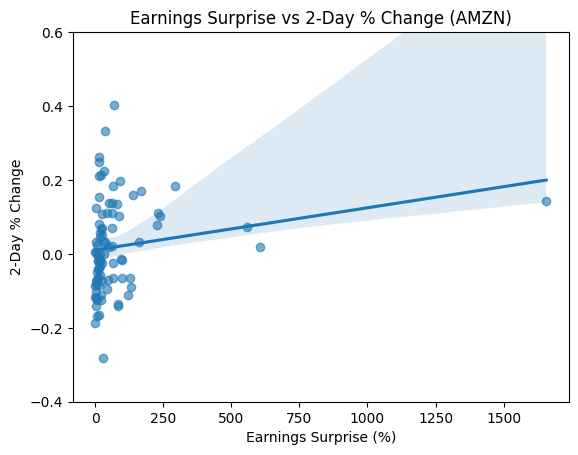

In [41]:
# Correlation plot
ax = sns.regplot(data = AMZN_Surprise, x='Surprise_clean', y='%Change_2day', scatter_kws={'alpha': 0.6})
ax.set(ylim=(-0.4, 0.6))
plt.title("Earnings Surprise vs 2-Day % Change (AMZN)")
plt.xlabel("Earnings Surprise (%)")
plt.ylabel("2-Day % Change")
plt.grid(False)
plt.show()

In [42]:
# Bull vs Bear Market Analysis

AMZN_history['Moving_Av_200'] = AMZN_history['Close'].rolling(window=200).mean()

AMZN_history['Market_Trend'] = np.where(
    AMZN_history['Close'] >= AMZN_history['Moving_Av_200'], 'Bull', 'Bear')
AMZN_history['Market_Trend'] = AMZN_history['Market_Trend'].where(AMZN_history['Moving_Av_200'].notna())

# Tag market trend for each earnings date
def get_market_trend(date, df):
    match = df[df['Date'] >= date]
    if not match.empty:
        return match.iloc[0]['Market_Trend']
    else:
        return np.nan

AMZN_Surprise['Market_Trend'] = AMZN_Surprise['Earnings Date'].apply(lambda x: get_market_trend(x, AMZN_history))

# Compare 2-day returns after positive surprises by market trend
AMZN_Surprise['Positive Surprise'] = AMZN_Surprise['Surprise_clean'] > 0

bull_returns = AMZN_Surprise[(AMZN_Surprise['Positive Surprise']) & (AMZN_Surprise['Market_Trend'] == 'Bull')]['%Change_2day']
bear_returns = AMZN_Surprise[(AMZN_Surprise['Positive Surprise']) & (AMZN_Surprise['Market_Trend'] == 'Bear')]['%Change_2day']

bull_surprise = AMZN_Surprise[(AMZN_Surprise['Positive Surprise']) & (AMZN_Surprise['Market_Trend'] == 'Bull')]['Surprise_clean']
bear_surprise = AMZN_Surprise[(AMZN_Surprise['Positive Surprise']) & (AMZN_Surprise['Market_Trend'] == 'Bear')]['Surprise_clean']

AMZN_Surprise

,Symbol,Earnings Date,Surprise (%),Surprise_clean,Positive Surprise,%Change_2day,Market_Trend
4,AMZN,2025-05-01,+16.74,16.74,True,-0.020242,Bear
5,AMZN,2025-02-06,+24.47,24.47,True,-0.023824,Bull
6,AMZN,2024-10-31,+25.17,25.17,True,0.050322,Bull
7,AMZN,2024-08-01,+22.58,22.58,True,-0.125224,Bull
8,AMZN,2024-04-30,+17.91,17.91,True,0.055543,Bull
...,...,...,...,...,...,...,...
111,AMZN,1998-07-22,+1.34,1.34,True,-0.072761,Bull
112,AMZN,1998-04-27,+13.92,13.92,True,0.154078,Bull
113,AMZN,1998-01-22,+11.41,11.41,True,-0.062881,NaN
114,AMZN,1997-10-27,+13.29,13.29,True,0.262192,NaN


In [43]:
print(f"\nBull Market: Median return after positive surprise: {bull_returns.median() * 100:.2f}%")
print(f"Bear Market: Median return after positive surprise: {bear_returns.median() * 100:.2f}%")
print(f"\nBull Market: Median return after positive surprise: {bull_returns.mean() * 100:.2f}%")
print(f"Bear Market: Median return after positive surprise: {bear_returns.mean() * 100:.2f}%")
print(f"\nBull Market: Median Surprise %: {bull_surprise.median():.2f}%")
print(f"Bear Market: Median Surprise %: {bear_surprise.median():.2f}%")


Bull Market: Median return after positive surprise: 0.00%
Bear Market: Median return after positive surprise: 0.55%

Bull Market: Median return after positive surprise: 2.08%
Bear Market: Median return after positive surprise: 1.69%

Bull Market: Median Surprise %: 32.60%
Bear Market: Median Surprise %: 17.06%


#### Answer to Question 4 Additional:

There does not appear to be a correlation (0.183 is very weak or negligible) and this is also shown in the scatter plot.
Bull market surprises are larger, but not always met with stronger reaction. Bear market is stronger when the median is used, but Bull market when the mean is used.

***FROM ChatGPT - to be followed up and checked for accuracy.***

Median return after positive surprise:

Bull Market: 0.00%
Bear Market: 0.55%

Interpretation:

This suggests that in bear markets, stocks react more positively to a positive earnings surprise than in bull markets — despite the market overall being weaker.
Why? Because during bear markets, investor sentiment is low and expectations are depressed. Positive surprises are rarer and often interpreted as a turnaround signal, driving stronger reactions.
In bull markets, optimism is already baked in — surprises may be met with a “meh.”

Median return after positive surprise (another sample?):

Bull Market: 2.08%
Bear Market: 1.69%
Interpretation:

Now we see the opposite trend — the reaction in bull markets is slightly stronger.
This tells us that results may vary depending on which period of data you're looking at — or which companies/events are included.
But both values are still in the same ballpark (~2%), so the difference is mild, and context matters.

Median Surprise %:

Bull Market: 32.60%
Bear Market: 17.06%
Interpretation:

Earnings surprises (as % above estimate) tend to be much larger in bull markets.
Possibly because:
Analysts are too conservative during bullish times (underestimating strength)
Companies overdeliver when growth is booming
In bear markets, analysts may already lower their expectations, so surprises are smaller in size.*

## Question 5. [Exploratory, optional] Brainstorm potential idea for your capstone project

Free text answer

Describe the capstone project you would like to pursue, considering your aspirations, ML model predictions, and prior knowledge. Even if you are unsure at this stage, try to generate an idea you would like to explore-such as a specific asset class, country, industry vertical, or investment strategy. Be as specific as possible.



 ### Answer Question 5:
 I think it is an interesting time to look at the Aerospace and Defense sector, but my conscience wouldn't allow me to profit from it. Instead I would like to build a model for the engineering and construction industry focusing on European stock markets. I need to get a better understanding of the industry and different types of stock market analysis to be more specific.

## Question 6. [Exploratory, optional] Investigate new metrics

Free text answer

Using the data sources we have covered (or any others you find relevant), download and explore a few additional metrics or time series that could be valuable for your project. Briefly explain why you think each metric is useful. This does not need to be a comprehensive list-focus on demonstrating your ability to generate data requests based on your project description, identify and locate the necessary data, and explain how you would retrieve it using Python.

### Answer Question 6:
I would like to focus on European stock market indexes (Stoxx 600, DAX, FTSE 100) and identfiy up to 20 of the largest companies in this sector.

Then use web scraping tools to access company earnings, news announcements and company reports.

Some metrics to investigate:
* Gross Margin per Project Type
* Return on Invested Capital (ROIC)
* Average Project Duration
* Sustainability Metrics

